>># **Ciencia de Datos en Python**
### Proyecto Final
###### *Marco Tulio Escobar Muñoz*

In [147]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import distplot
import seaborn as sns
from sklearn.model_selection import train_test_split

class my_regresion():
    def __init__(self, archivo):
        self.beta0 = []
        self.beta1 = []
        self.x = [] 
        self.y = [] 
        self.yHat = [] 
        self.Error = [] 
        self.GradB0 = [] 
        self.GradB1 = []
        self.ParB0 = []
        self.ParB1 = []
        self.A = 0 
        self.B = 0
        self.C = 0 
        self.D = 0 
        self.E = 0 
        self.F = 0
        self.diccionario = dict()
        self.pdData = pd.DataFrame()
        self.y = []
        self.archivo = np.load(archivo)
        self.dsEntrenamientoNan = []
        self.flMedia = []
        self.flValorMaximo = []
        self.flValorMinimo = []
        self.flRango = []
        self.flDesviacionEstandar = []
        self.epochs = 0
        self.print_error = 0
        self.learing_rate = 0.0
        self.matriz = []
        self.ArrVal = []
        
        #División de la Data entrenamiento y validación
        self.long = len(self.archivo)
        self.long80 = int(self.long * 0.80)
        self.long81 = int(self.long * 0.80) + 1
        self.long20 = self.long * 0.20
        self.dsEntrenamiento = self.archivo[0:self.long81]
        self.dsValidacion = self.archivo[self.long80:]
        
        #Exploración de la Data
    def GetExploraionData(self, dsDataSet):
        self.dsEntrenamientoNan = dsDataSet
        self.dsEntrenamientoNan[np.isnan(dsDataSet)] = 0
        self.flMedia = np.nanmean(dsDataSet,axis=1)
        self.flValorMaximo = np.nanmax(dsDataSet,axis=1)
        self.flValorMinimo = np.nanmin(dsDataSet,axis=1)
        self.flRango = np.ptp(dsDataSet,axis=1)
        self.flDesviacionEstandar = np.nanstd(dsDataSet,axis=1)
        
        return self.flMedia, self.flValorMaximo, self.flValorMinimo, self.flRango, self.flDesviacionEstandar
    
    #Diagrama de Histograma sobre los Datos usando Seaborn
    def GetHistogram(self, dsDataSet):
        sns.set_theme()
        distplot(dsDataSet, rug=True, hist=False)
    
    #Correlación de los Datos
    
    def DivArrCoe(self, dsDataSet):
        #ρ = -1 Correlación perfecta negativa
        #ρ = 0  No existe correlación
        #ρ = +1 Correlación perfecta positiva
        #self.A, self.B, self.C, self.D, self.E, self.F = np.hsplit(dsDataSet,6)
        self.A = np.corrcoef(dsDataSet[:,0],dsDataSet[:,1])[1,0]
        self.B = np.corrcoef(dsDataSet[:,0],dsDataSet[:,2])[1,0]
        self.C = np.corrcoef(dsDataSet[:,0],dsDataSet[:,3])[1,0]
        self.D = np.corrcoef(dsDataSet[:,0],dsDataSet[:,4])[1,0]
        self.F = np.corrcoef(dsDataSet[:,0],dsDataSet[:,5])[1,0]
        self.E = max(self.A,self.B,self.C,self.D,self.F)
        if (self.E == self.A):
            plt.plot()
            plt.scatter(dsDataSet[:,0],dsDataSet[:,1])
            plt.title('Coeficiente ' + "{:.2f}".format(self.A))
            plt.show()
        if (self.E == self.B):
            plt.scatter(dsDataSet[:,0],dsDataSet[:,2])
            plt.title('Coeficiente ' + "{:.2f}".format(self.B))
            plt.show()
        if (self.E == self.C):
            plt.scatter(dsDataSet[:,0],dsDataSet[:,3])
            plt.title('Coeficiente ' + "{:.2f}".format(self.C))
            plt.show()
        if (self.E == self.D):
            plt.scatter(dsDataSet[:,0],dsDataSet[:,4])
            plt.title('Coeficiente ' + "{:.2f}".format(self.D))
            plt.show()
        if (self.E == self.F):
            plt.scatter(dsDataSet[:,0],dsDataSet[:,5])
            plt.title('Coeficiente ' + "{:.2f}".format(self.F))
            plt.show()
        
    def TrainingModel(self, depX, indY, intEpochs, intPrintError, fltLearningRate):
        #inicializando variables
        self.beta0 = []
        self.beta1 = []
        self.yHat = []
        self.Error = []
        self.GradB1 = []
        self.GradB0 = []
        
        self.x = depX 
        self.y = indY 
        self.epochs = intEpochs
        self.print_error = intPrintError
        self.learning_rate = fltLearningRate
        self.pdData =  pd.DataFrame(self.x)
        self.pdData['1'] = 1
                      
        self.i = 0
        while self.i <= self.epochs:
            self.beta0.append(((len(self.x) * np.sum(self.x[self.i] * self.y[self.i])) - (np.sum(self.x[self.i])*np.sum(self.y[self.i]))) / ((len(self.x) * np.sum(self.x[self.i]**2)) - np.sum(self.x[self.i])**2))
            self.beta1.append(((len(self.x) * np.sum(self.x[self.i]**2) * np.sum(self.y[self.i])) - (np.sum(self.x[self.i]) * np.sum(self.y[self.i] * self.x[self.i]))) / ((len(self.x) * np.sum(self.x[self.i]**2)) - np.sum(self.x[self.i])**2))
            self.yHat.append((self.pdData[0][self.i] * self.beta0[self.i]) + (self.pdData['1'][self.i] * self.beta1[self.i]))    
            self.Error.append((1 / (2 * len(self.x))) * (len(self.x) * (np.sum(self.y[self.i] - self.yHat[self.i])**2)))
            self.GradB1.append(1 / len(self.x) * np.sum((self.yHat[self.i] - self.y[self.i]) * self.x[self.i]))
            self.GradB0.append(1 / len(self.x) * np.sum((self.yHat[self.i] - self.y[self.i])))
            if (len(my.ParB0) == 0 ):
                self.ParB0.append(0 - self.learning_rate * self.GradB0[self.i])
            else:
                self.ParB0.append(self.ParB0[self.i-1] - self.learning_rate * self.GradB0[self.i])
            if (len(my.ParB1) == 0 ):
                self.ParB1.append(0 - self.learning_rate * self.GradB1[self.i])
            else:    
                self.ParB1.append(self.ParB1[self.i-1] - self.learning_rate * self.GradB1[self.i])
            
            #self.diccionario[self.i] = [['Iteracion', self.i], ['Beta 0' , self.beta0[self.i]] , ['Beta 1' , self.beta1[self.i]], ['yHat', self.yHat[self.i]], ['Error' , self.Error[self.i]], ['Gradiante B0' , self.GradB0[self.i]], ['Gradiante B1' , self.GradB1[self.i]], ['Par B0' , self.ParB0[self.i]], ['Par B1' , self.ParB1[self.i]]]
            self.diccionario[self.i] = {'Iteracion':self.i, 'Beta 0':self.beta0[self.i], 'Beta 1':self.beta1[self.i], 'yHat':self.yHat[self.i], 'Error':self.Error[self.i], 'Gradiante B0':self.GradB0[self.i], 'Gradiante B1':self.GradB1[self.i], 'Par B0':self.ParB0[self.i], 'Par B1':self.ParB1[self.i]}
            
            self.i += 1
            
        return self.diccionario, self.Error 
    
    def Graf(self, diccionario, error):
        plt.plot(diccionario.keys(), error)
        return
    
    def GrafIt(self, diccionario, IteraN):
        self.n = n
        self.dic2 = diccionario
        self.grafx = []
        self.gra
        m = 0
        for key in self.dic2:
            if (clave == m):
                self.grafx.append(clave)
            
                self.dec
                self.grafx = self.dic2[0].keys()
            
            m += self.n  
    
    
    def Sklear(self, X, Y, fltTrain):
        from sklearn.model_selection import train_test_split
        #Separa datos entrenamiento y prueba
        X_train, X_test, y_train, y_test = train_test_split(self.x, self.y, test_size= fltTrain)
        #Algoritmo a usar
        lm = linear_model.LinearRegression()
        #Entrenar el modelo
        lm.fit(X_train, y_train)
        #Realizo una predicción
        Y_pred = lm.predict(X_test)
        #Valor de la pendiente o coeficiente y
        lm.coef
        #Valor de la intersección o coeficiente x
        lr.intercept
        #Precisión del modelo
        lr.score(X_train, y_train)
            
            
    

In [148]:
my = my_regresion("proyecto_training_data.npy")

In [149]:
my.__init__

<bound method my_regresion.__init__ of <__main__.my_regresion object at 0x0000029592CCE550>>

In [150]:
my.__dict__

{'beta0': [],
 'beta1': [],
 'x': [],
 'y': [],
 'yHat': [],
 'Error': [],
 'GradB0': [],
 'GradB1': [],
 'ParB0': [],
 'ParB1': [],
 'A': 0,
 'B': 0,
 'C': 0,
 'D': 0,
 'E': 0,
 'F': 0,
 'diccionario': {},
 'pdData': Empty DataFrame
 Columns: []
 Index: [],
 'archivo': array([[2.08500e+05, 7.00000e+00, 8.56000e+02, 8.00000e+00, 2.00300e+03,
         6.50000e+01],
        [1.81500e+05, 6.00000e+00, 1.26200e+03, 6.00000e+00, 1.97600e+03,
         8.00000e+01],
        [2.23500e+05, 7.00000e+00, 9.20000e+02, 6.00000e+00, 2.00100e+03,
         6.80000e+01],
        ...,
        [2.66500e+05, 7.00000e+00, 1.18800e+03, 9.00000e+00, 1.94100e+03,
         6.60000e+01],
        [1.42125e+05, 5.00000e+00, 1.07800e+03, 5.00000e+00, 1.95000e+03,
         6.80000e+01],
        [1.47500e+05, 5.00000e+00, 1.25600e+03, 6.00000e+00, 1.96500e+03,
         7.50000e+01]]),
 'dsEntrenamientoNan': [],
 'flMedia': [],
 'flValorMaximo': [],
 'flValorMinimo': [],
 'flRango': [],
 'flDesviacionEstandar': [],
 

In [151]:
my.GetExploraionData(my.dsEntrenamiento)

(array([35239.83333333, 30805.        , 37750.33333333, ...,
        41521.83333333, 29338.33333333, 39717.33333333]),
 array([208500., 181500., 223500., ..., 245350., 173000., 235000.]),
 array([7., 6., 6., ..., 7., 6., 6.]),
 array([208493., 181494., 223494., ..., 245343., 172994., 234994.]),
 array([77487.55164846, 67396.91578255, 83072.83863106, ...,
        91158.42669846, 64251.45434584, 87336.02445281]))

D:\Users\Tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
D:\Users\Tulio\anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


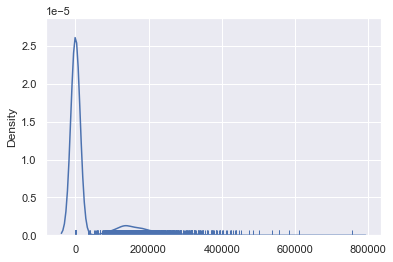

In [152]:
my.GetHistogram(my.dsEntrenamiento)

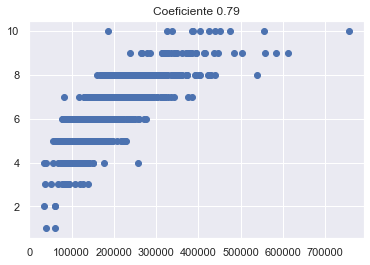

In [153]:
my.DivArrCoe(my.dsEntrenamiento)

In [154]:
my.TrainingModel(my.dsEntrenamiento[:,0], my.dsEntrenamiento[:,1], 3,10,25)

({0: {'Iteracion': 0,
   'Beta 0': 3.3573141486810554e-05,
   'Beta 1': 7.0,
   'yHat': 14.0,
   'Error': 24.5,
   'Gradiante B0': 0.005988023952095808,
   'Gradiante B1': 1248.502994011976,
   'Par B0': -0.1497005988023952,
   'Par B1': -31212.5748502994},
  1: {'Iteracion': 1,
   'Beta 0': 3.305785123966942e-05,
   'Beta 1': 6.0,
   'yHat': 12.0,
   'Error': 18.0,
   'Gradiante B0': 0.005132591958939264,
   'Gradiante B1': 931.5654405474764,
   'Par B0': -0.2780153977758768,
   'Par B1': -54501.710863986315},
  2: {'Iteracion': 2,
   'Beta 0': 3.1319910514541384e-05,
   'Beta 1': 7.0,
   'yHat': 14.0,
   'Error': 24.5,
   'Gradiante B0': 0.005988023952095808,
   'Gradiante B1': 1338.3233532934132,
   'Par B0': -0.427715996578272,
   'Par B1': -87959.79469632165},
  3: {'Iteracion': 3,
   'Beta 0': 5e-05,
   'Beta 1': 7.0,
   'yHat': 14.0,
   'Error': 24.5,
   'Gradiante B0': 0.005988023952095808,
   'Gradiante B1': 838.3233532934131,
   'Par B0': -0.5774165953806671,
   'Par B1': -10

In [155]:
for clave in my.diccionario:
    # Hacer algo con esa clave
    print(clave)

0
1
2
3


In [156]:

dic = my.diccionario.values()
lista = []
valor = []
cc = []
for clave in dic:
    #print(clave)
    cc = np.append(cc, np.array(clave))
    pa = pd.Series(clave)
    #df.append(clave, ignore_index=True)
    #df = pd.DataFrame([clave for clave in dic.keys()], columns=['Iteracion'])
    #df = pd.DataFrame([clave1 for clave1 in clave.keys()], columns=['Iteracion'])
    #df['Iteracion'] = [value['Iteracion'] for value in clave.values()]
    #for clave1 in clave:
        #print(clave1)
        #valor = clave[clave1]
        #df[clave1] = 0
        #df.loc[clave1] = df.append(valor)
        #df = pd.DataFrame([clave1 for clave1 in clave.keys()], columns=['Iteracion'])
        #df['Iteracion'] = [value['Iteracion'] for value in clave.values()]
        #lista.append(valor)
        
        #print('.....')
        #print(valor)
        #print(lista)
       
    

In [157]:
dic

dict_values([{'Iteracion': 0, 'Beta 0': 3.3573141486810554e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 1248.502994011976, 'Par B0': -0.1497005988023952, 'Par B1': -31212.5748502994}, {'Iteracion': 1, 'Beta 0': 3.305785123966942e-05, 'Beta 1': 6.0, 'yHat': 12.0, 'Error': 18.0, 'Gradiante B0': 0.005132591958939264, 'Gradiante B1': 931.5654405474764, 'Par B0': -0.2780153977758768, 'Par B1': -54501.710863986315}, {'Iteracion': 2, 'Beta 0': 3.1319910514541384e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 1338.3233532934132, 'Par B0': -0.427715996578272, 'Par B1': -87959.79469632165}, {'Iteracion': 3, 'Beta 0': 5e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 838.3233532934131, 'Par B0': -0.5774165953806671, 'Par B1': -108917.87852865698}])

In [158]:
df = pd.DataFrame(cc, columns = ["Iteracion"])
df

,Iteracion
0,"{'Iteracion': 0, 'Beta 0': 3.3573141486810554e..."
1,"{'Iteracion': 1, 'Beta 0': 3.305785123966942e-..."
2,"{'Iteracion': 2, 'Beta 0': 3.1319910514541384e..."
3,"{'Iteracion': 3, 'Beta 0': 5e-05, 'Beta 1': 7...."


In [159]:
cc

array([{'Iteracion': 0, 'Beta 0': 3.3573141486810554e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 1248.502994011976, 'Par B0': -0.1497005988023952, 'Par B1': -31212.5748502994},
       {'Iteracion': 1, 'Beta 0': 3.305785123966942e-05, 'Beta 1': 6.0, 'yHat': 12.0, 'Error': 18.0, 'Gradiante B0': 0.005132591958939264, 'Gradiante B1': 931.5654405474764, 'Par B0': -0.2780153977758768, 'Par B1': -54501.710863986315},
       {'Iteracion': 2, 'Beta 0': 3.1319910514541384e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 1338.3233532934132, 'Par B0': -0.427715996578272, 'Par B1': -87959.79469632165},
       {'Iteracion': 3, 'Beta 0': 5e-05, 'Beta 1': 7.0, 'yHat': 14.0, 'Error': 24.5, 'Gradiante B0': 0.005988023952095808, 'Gradiante B1': 838.3233532934131, 'Par B0': -0.5774165953806671, 'Par B1': -108917.87852865698}],
      dtype=object)

In [160]:
pd.Series(dic)

0    {'Iteracion': 0, 'Beta 0': 3.3573141486810554e...
1    {'Iteracion': 1, 'Beta 0': 3.305785123966942e-...
2    {'Iteracion': 2, 'Beta 0': 3.1319910514541384e...
3    {'Iteracion': 3, 'Beta 0': 5e-05, 'Beta 1': 7....
dtype: object

In [161]:
pa

Iteracion            3.000000
Beta 0               0.000050
Beta 1               7.000000
yHat                14.000000
Error               24.500000
Gradiante B0         0.005988
Gradiante B1       838.323353
Par B0              -0.577417
Par B1         -108917.878529
dtype: float64

In [172]:
data = pd.DataFrame(my.diccionario)
data = data.T
data

,Iteracion,Beta 0,Beta 1,yHat,Error,Gradiante B0,Gradiante B1,Par B0,Par B1
0,0.0,0.000034,7.0,14.0,24.5,0.005988,1248.502994,-0.149701,-31212.574850
1,1.0,0.000033,6.0,12.0,18.0,0.005133,931.565441,-0.278015,-54501.710864
2,2.0,0.000031,7.0,14.0,24.5,0.005988,1338.323353,-0.427716,-87959.794696
3,3.0,0.000050,7.0,14.0,24.5,0.005988,838.323353,-0.577417,-108917.878529


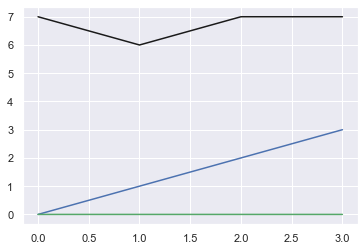

In [175]:
plt.plot(data['Iteracion'], data['Iteracion'], 'b', data['Iteracion'], data['Beta 0'], 'g', data['Iteracion'], data['Beta 1'], 'k',  )